![AES_744 Masthead](http://kyrill.ias.sdsmt.edu/wjc/eduresources/AES_519_Masthead.png)
# Unit-Fu and Projection-Fu with XArray and MetPy (MetPy V1.0 Edition).

## Intro

In earlier sessions, we've cracked a netcdf / grib file with Xarray.  

We did a rudementary plot with few frills.

Today we are going to get a little fancier project data and use map projections as well as a little bit of unit conversions and editing the metadata of our files.

## Prerequisite Nerd Skills

For this exercize to get started it's a good idea to have these skills under your belt.  

*  Introductory Plotting with Python.  For a review you can see the "Quick Start" Exercise Number 2 ([Session 2: Arrays, Math, and Plotting in Python (numpy and matplotlib)](https://wjcapehart.github.io/AES_CEE_Python/02%20Crash%20Course%20in%20Basic%20Python.html#session-2-arrays-math-and-plotting-in-python-numpy-and-matplotlib))
*  We'll also be needing a grip on working with Axes and other more advanced graphcis  structures, such as the [previous rage-quit session on working with axesesessess](https://wjcapehart.github.io/AES_CEE_Python/03%20Rage-Quit%20Explainers%20and%20Deep%20Dives.html#working-with-fancier-elements-of-matplotlib).
*  There is the training [material above on basic mapping](https://wjcapehart.github.io/AES_CEE_Python/03%20Rage-Quit%20Explainers%20and%20Deep%20Dives.html#projecting-maps-not-psychological-in-python-and-trolling-flat-earthers) to get you startted with Cartopy.

*   Also if you really want to get fancy we have 

## Libraries and Preparation

Let's start by loading up a set of libraries that we'll be working with today.

*  [NumPy](https://numpy.org): our library source arrays, matrices, and high-level math functions.
*  [Matplotlib](https://matplotlib.org): our 2-d plotting library.  

and some new ones:

* [Xarray](http://xarray.pydata.org/en/stable/): N-D labeled arrays and datasets in Python

* [MetPy](https://unidata.github.io/MetPy/latest/index.html): The Unidata Meteorological Python Toolkit
  
* [Cartopy](https://scitools.org.uk/cartopy/docs/latest/): A Geospatial Projection and Mapping Toolkit.
 
You should have these new ones but if not... try this in the notebook command pair.  
```
import sys as sys
!{sys.executable} -m pip install cartopy metpy xarray qgrid netCDF4 cfgrib cfunits bottleneck dask
```

for conda/anaconda you will need the following in your anaconda shell:

```
conda install -c conda-forge xarray dask netCDF4 bottleneck

```
The above will hopefully take care of the problem we had last tine with OPeNDAP.


###  Loading our Libraries

In [1]:
##########################################################
#
# Library Calls.
#

# loading numpy

import numpy             as np

# loading matplotlib

import matplotlib.pyplot as plt

# loading xarray

import xarray            as xr

# Loading MetPy

import metpy             as metpy


# Loading Cartopy's Projection and 
#   Geospatial Dataset Plotting Features

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature

#
##########################################################

## Let's pick a file!

We can get files from anywhere.  

We have plenty of datasets to get in our [THREDDS](http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/catalog.html) repository.

Soe examples of opendap addresses are below.

Opendap Address (SDSMT):

```
http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/CLASS_Examples/NAM_2020-11-11_12/nam_218_20201111_1200_012.grb2
```


Opendap Address (NOAA NCEI):

```
https://www.ncei.noaa.gov/thredds/dodsC/model-nam218/202011/20201111/nam_218_20201111_1200_012.grb2
```


Direct HTTP Download Address:  This is what you should probably use for now!

```
http://kyrill.ias.sdsmt.edu:8080/thredds/fileServer/CLASS_Examples/NAM_2020-11-11_12/nam_218_20201111_1200_012.grb2
```

This is a NAM Forecast and is also projected into WMO Projection [#218](https://www.nco.ncep.noaa.gov/pmb/docs/on388/tableb.html#GRID218). 

In [19]:
##########################################################
#
# Touching our NetCDF File
#

# local Netcdf copy example
#am_file = "~/Downloads/nam_218_20201111_1200_012.grb2.nc"

# grabbing it from our TDS
nam_file = "https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/NAM/CONUS_40km/conduit/NAM_CONUS_40km_conduit_20221115_1800.grib2"

# grabbing it from NCDC/NCDI's TDS
#nam_file = "https://www.ncei.noaa.gov/thredds/dodsC/model-nam218/202011/20201111/nam_218_20201111_1200_012.grb2"

ds = xr.open_dataset(nam_file)

display(ds)

#
##########################################################

<xarray.Dataset>
Dimensions:                                                                          (
                                                                                      x: 185,
                                                                                      y: 129,
                                                                                      time: 52,
                                                                                      time1: 52,
                                                                                      time2: 28,
                                                                                      ...
                                                                                      pressure_difference_layer4_bounds_1: 2,
                                                                                      pressure_difference_layer5_bounds_1: 2,
                                                                                      pressure_difference_layer6_bounds_1: 2,
                                                                                      isobaric_layer_bounds_1: 2,
                                                                                      depth_below_surface_layer1_bounds_1: 2,
                                                                                      depth_below_surface_layer2_bounds_1: 2)
Coordinates: (12/33)
  * x                                                                                (x) float32 ...
  * y                                                                                (y) float32 ...
    reftime                                                                          datetime64[ns] ...
  * time                                                                             (time) datetime64[ns] ...
  * time1                                                                            (time1) datetime64[ns] ...
  * time2                                                                            (time2) datetime64[ns] ...
    ...                                                                               ...
  * pressure_difference_layer6                                                       (pressure_difference_layer6) float32 ...
  * height_above_ground2                                                             (height_above_ground2) float32 ...
  * isobaric_layer                                                                   (isobaric_layer) float32 ...
  * depth_below_surface_layer1                                                       (depth_below_surface_layer1) float32 ...
  * depth_below_surface_layer2                                                       (depth_below_surface_layer2) float32 ...
  * hybrid1                                                                          (hybrid1) float32 ...
Dimensions without coordinates: time_bounds_1, time2_bounds_1,
                                sigma_layer_bounds_1,
                                pressure_difference_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                height_above_ground_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                ...
                                pressure_difference_layer4_bounds_1,
                                pressure_difference_layer5_bounds_1,
                                pressure_difference_layer6_bounds_1,
                                isobaric_layer_bounds_1,
                                depth_below_surface_layer1_bounds_1,
                                depth_below_surface_layer2_bounds_1
Data variables: (12/197)
    LambertConformal_Projection                                                      int32 ...
    time_bounds                                                                      (time, time_bounds_1) datetime64[ns] ...
    time2_bounds                       

## A closer look at the metadata 

Take a look at the above output.  You may or may not have a field of latitude and longitude. If not no worries.  The "x" and "y" dimensions in this grib dataset contain map eastings and northings coordinates.  They will also connect to the projection information that is sitting in the variable called above "LambertConformal_Projection."  

Those x and y and the projection data values aren't the original data and are integrated into the OPeNDAP interface to emulate NetCDF Access.  It's actually following most of the CF-Metadata standard protocals (you see it in the file attrubutes. 

This also gives is a beachead by which to work with the data for plotting, meteorological operations and unit conversions.  

## Getting Ready for MetPy

The good news is that rather than opening a gazzilion set of libraries, we can limit them to a few. 

For us the big one is [MetPy](https://unidata.github.io/MetPy/latest/index.html) from Unidata.  MetPy has integration not only with other unidata products like their UDUnits package but also can integrate with libraries like xarray, pandas, and cartoply.  

### Locking in the CF Metadata

If you aren't going through OPeNDAP to access grib data, you probably should run it through a filter to ensure that things will mesh well with the backage.  I recommend passing it through the "accessor," [metpy.xarray.MetPyDataArrayAccessor.parse_cf()](https://unidata.github.io/MetPy/latest/api/generated/metpy.xarray.html#accessors).  That resources is nice since it lets you also pull things like latitude and longitude arrays.

The *parse_cf* accessor will rewrite and append the dataset field to integrate CF-friendly fields.

In [20]:
##########################################################
# 
# Parsing our dataset geospatial address system into a 
#     more CF-Friendly environment.
#

ds = ds.metpy.parse_cf()

display(ds)

#
##########################################################

<xarray.Dataset>
Dimensions:                                                                          (
                                                                                      time: 52,
                                                                                      time_bounds_1: 2,
                                                                                      time2: 28,
                                                                                      time2_bounds_1: 2,
                                                                                      sigma_layer: 1,
                                                                                      ...
                                                                                      height_above_ground2: 1,
                                                                                      depth_below_surface: 1,
                                                                                      height_above_ground: 2,
                                                                                      isobaric4: 1,
                                                                                      isobaric: 2,
                                                                                      hybrid1: 2)
Coordinates: (12/34)
    reftime                                                                          datetime64[ns] ...
  * time                                                                             (time) datetime64[ns] ...
  * time2                                                                            (time2) datetime64[ns] ...
  * sigma_layer                                                                      (sigma_layer) float32 ...
  * pressure_difference_layer                                                        (pressure_difference_layer) float32 ...
  * pressure_difference_layer1                                                       (pressure_difference_layer1) float32 ...
    ...                                                                               ...
  * height_above_ground2                                                             (height_above_ground2) float32 ...
  * depth_below_surface                                                              (depth_below_surface) float32 ...
  * height_above_ground                                                              (height_above_ground) float32 ...
  * isobaric4                                                                        (isobaric4) float32 ...
  * isobaric                                                                         (isobaric) float32 ...
  * hybrid1                                                                          (hybrid1) float32 ...
Dimensions without coordinates: time_bounds_1, time2_bounds_1,
                                sigma_layer_bounds_1,
                                pressure_difference_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                height_above_ground_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                ...
                                pressure_difference_layer4_bounds_1,
                                pressure_difference_layer5_bounds_1,
                                pressure_difference_layer6_bounds_1,
                                isobaric_layer_bounds_1,
                                depth_below_surface_layer1_bounds_1,
                                depth_below_surface_layer2_bounds_1
Data variables: (12/197)
    LambertConformal_Projection                                                      int32 ...
    time_bounds                                                                      (time, time_bounds_1) datetime64[ns] ...
    time2_bounds                                                                     (time2, time2_bounds_1) datetime6

If you have a sharp eye you may notice a new field in the coordinates, "metpy_crs."  It contains a lot more data than is visible including a projection object.

In [21]:
##########################################################
# 
# Peeking at the CRS field.
#


display(ds.metpy_crs)


print(ds["Geopotential_height_isobaric"].values)


#
##########################################################

<xarray.DataArray 'metpy_crs' ()>
array(<metpy.plots.mapping.CFProjection object at 0x18b71a250>,
      dtype=object)
Coordinates:
    reftime    datetime64[ns] 2022-11-15T18:00:00
    metpy_crs  object Projection: lambert_conformal_conic

[[[[ 2.06322734e+04  2.06332324e+04  2.06342734e+04 ...  2.06004316e+04
     2.06009531e+04  2.06015117e+04]
   [ 2.06324727e+04  2.06330332e+04  2.06337129e+04 ...  2.05995918e+04
     2.06000723e+04  2.06007520e+04]
   [ 2.06327930e+04  2.06329922e+04  2.06332324e+04 ...  2.05987129e+04
     2.05989922e+04  2.05998320e+04]
   ...
   [ 2.05787520e+04  2.05801523e+04  2.05820332e+04 ...  2.02109121e+04
     2.02119922e+04  2.02134316e+04]
   [ 2.05796719e+04  2.05797520e+04  2.05804727e+04 ...  2.02041934e+04
     2.02051523e+04  2.02063516e+04]
   [ 2.05816328e+04  2.05803926e+04  2.05798320e+04 ...  2.01976719e+04
     2.01985527e+04  2.01995918e+04]]

  [[ 1.82179629e+04  1.82190840e+04  1.82200840e+04 ...  1.82098438e+04
     1.82100430e+04  1.82102031e+04]
   [ 1.82178047e+04  1.82189238e+04  1.82200840e+04 ...  1.82086035e+04
     1.82088047e+04  1.82092441e+04]
   [ 1.82176035e+04  1.82187246e+04  1.82199238e+04 ...  1.82078828e+04
     1.82082031e+04  1.82087246e+04]
   ...
   

## Let's pull some data.

Here we are going to pull some items to play with:

* Temperature at 2-m (in Kelvin - yeah, we're gonna do somthing about that)
* Mean Sea Level Pressure (in Pa - yeah, that too)
   *  But wait!  There are TWO versions of mean sea level pressure!  "Now how much would you pay!"
* Geopotential Isobaric Height at 500 hPa and 1000 hPa.

In [23]:
##########################################################
#
# Let's pull some data - and we're going to need to tag units
#
#   you will want to pull that single time coordinate out, too.
#

# Isobaric Height

vert_dim_name = ds["Geopotential_height_isobaric"].dims[1]
print(vert_dim_name)


time_dim_name = ds["Geopotential_height_isobaric"].dims[0]
print(time_dim_name)

z_0500hpa_gpm = ds["Geopotential_height_isobaric"].isel(time3=0)[(ds[vert_dim_name] ==  50000),:,:]
z_1000hpa_gpm = ds["Geopotential_height_isobaric"].isel(time3=0)[(ds[vert_dim_name] == 100000),:,:]

display(z_0500hpa_gpm.values)
display(z_1000hpa_gpm.values)

# Both MSLPs

mslp_Pa     = ds["Pressure_reduced_to_MSL_msl"].isel(time3=0)
#mslp_eta_Pa = ds["MSLP_Eta_model_reduction_msl"].isel(time2=0)

# 2-m air Temperature

vert_dim_name = ds["Temperature_height_above_ground"].dims[1]
print(vert_dim_name)

t2m_degK    = ds["Temperature_height_above_ground"].isel(time3=0)[(ds[vert_dim_name] == 2),:,:]

#
##########################################################

isobaric2
time3


array([[[5868.5566, 5868.397 , 5868.217 , ..., 5866.5566, 5866.797 ,
         5866.857 ],
        [5868.897 , 5868.797 , 5868.537 , ..., 5866.0967, 5867.5566,
         5867.417 ],
        [5868.997 , 5869.017 , 5868.917 , ..., 5867.697 , 5868.737 ,
         5868.417 ],
        ...,
        [5558.437 , 5567.5566, 5576.417 , ..., 5305.797 , 5310.317 ,
         5313.957 ],
        [5568.357 , 5576.757 , 5584.957 , ..., 5299.0566, 5304.1167,
         5308.317 ],
        [5577.857 , 5585.437 , 5592.957 , ..., 5292.497 , 5297.897 ,
         5302.497 ]]], dtype=float32)

array([[[117.95663 , 119.50862 , 121.28462 , ...,  91.348625,
          92.708626,  94.80463 ],
        [119.81262 , 121.06062 , 122.724625, ...,  93.71662 ,
          94.084625,  95.572624],
        [121.876625, 122.724625, 124.180626, ...,  96.11662 ,
          93.52463 ,  97.18862 ],
        ...,
        [113.876625, 117.22063 , 122.13262 , ...,  65.94063 ,
          61.36462 ,  56.276623],
        [122.90063 , 126.820625, 132.00462 , ...,  62.852623,
          58.72462 ,  53.700623],
        [133.57263 , 137.76462 , 142.74063 , ...,  59.71662 ,
          55.812622,  51.68462 ]]], dtype=float32)

height_above_ground2


## "Unit-Fu, *with metadata!*"

(and yes you ***are*** going to experience what "drive in totals" are in class!)

One of the niftier things here is that this will manage units for you as well.  There are a number of "aquisitions" of the Unidata UdUnits.  But this is Unidata's so use this one. Best of all it's in MetPy so dollars to donuts, you're gonna get it loaded anyway.  

The downside is that the new version of MetPy will require you to correct the metadata so make sure of that.

Here you can add an extention to the your variables attributes as shown below.

Here is an example of how to implement it. Again, we use the same accessor as above.  But first remember that to copy your data to a new array valiue!

When done notice that it also patches your metadata!  That's important since MetPy has calculation routines on board.

In [24]:
##########################################################
#
# Units!
#

##  Temperature Units

print("2-m Air Temperature Before Unit Conversion")
display(t2m_degK[0:10,0])
print(" ")
print("  - - - - - - - - - - - -  ")
print(" ")



t2m_degF = t2m_degK.copy()

t2m_degF = t2m_degF.metpy.convert_units('degF')
 
t2m_degF.attrs["units"] = "degF"

print("2-m Air Temperature After Unit Conversion")
display(t2m_degF[0:10,0])
print(" ")
print(" ")
print("  =======================  ")
print(" ")
print(" ")

##  Pressure Units
print("Mean Sea Level Presssure Before Unit Conversion")
display(mslp_Pa[0:10,0])
print(" ")
print("  - - - - - - - - - - - -  ")
print(" ")

#mslp_eta_hPa = mslp_eta_Pa.copy()
mslp_hPa     = mslp_Pa.copy()

#mslp_eta_hPa = mslp_eta_hPa.metpy.convert_units('hPa')
mslp_hPa     = mslp_hPa.metpy.convert_units('hPa')

#mslp_eta_hPa.attrs["units"] = "hPa"
mslp_hPa.attrs["units"] = "hPa"


print("Mean Sea Level Presssure After Unit Conversion")
display(mslp_hPa[0:10,0])
print(" ")
print(" ")
print("  =======================  ")
print(" ")
print(" ")

#
##########################################################

2-m Air Temperature Before Unit Conversion


<xarray.DataArray 'Temperature_height_above_ground' (height_above_ground2: 1,
                                                     x: 185)>
[185 values with dtype=float32]
Coordinates:
    reftime               datetime64[ns] 2022-11-15T18:00:00
  * x                     (x) float32 -4.226e+06 -4.185e+06 ... 3.251e+06
    y                     float32 -8.327e+05
    time3                 datetime64[ns] 2022-11-15T18:00:00
    metpy_crs             object Projection: lambert_conformal_conic
  * height_above_ground2  (height_above_ground2) float32 2.0
Attributes: (12/13)
    long_name:                       Temperature @ Specified height level abo...
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-0-0_L103
    Grib2_Parameter:                 [0 0 0]
    ...                              ...
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                103
    Grib2_Level_Desc:                Specified height level above ground
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

 
  - - - - - - - - - - - -  
 
2-m Air Temperature After Unit Conversion


Magnitude,[[77.7249755859375 77.74293518066406 77.70695495605469 77.67097473144531 77.77896881103516 77.7249755859375 77.63494110107422 77.63494110107422 77.68893432617188 77.6529541015625 77.59896087646484 77.68893432617188 77.54496002197266 77.50892639160156 77.50892639160156 77.52694702148438 77.52694702148438 77.61697387695312 77.81494903564453 77.99496459960938 77.886962890625 77.81494903564453 77.67097473144531 77.61697387695312 77.63494110107422 77.59896087646484 77.63494110107422 77.63494110107422 77.68893432617188 77.68893432617188 77.68893432617188 77.50892639160156 77.11297607421875 76.98696899414062 76.98696899414062 76.93296813964844 76.84293365478516 76.75296020507812 76.7889404296875 76.89693450927734 76.98696899414062 77.11297607421875 77.05892944335938 77.04096221923828 76.91494750976562 76.96894836425781 77.27497100830078 77.50892639160156 77.59896087646484 77.8509292602539 78.39096069335938 78.91297912597656 79.200927734375 79.38094329833984 79.45295715332031 79.54293823242188 79.56095123291016 79.47097778320312 79.41697692871094 79.41697692871094 79.48893737792969 79.4349365234375 79.4349365234375 79.47097778320312 79.47097778320312 79.52497100830078 79.59693145751953 79.72294616699219 79.95695495605469 80.1009292602539 80.35295867919922 80.5689468383789 80.65892791748047 80.82097625732422 81.00093078613281 81.2709732055664 81.50492858886719 81.2529525756836 81.16297912597656 81.2529525756836 81.39693450927734 81.46894836425781 81.55892181396484 81.70295715332031 81.77497100830078 81.63094329833984 81.52294158935547 81.36095428466797 87.22896575927734 82.8189468383789 73.27896881103516 74.14293670654297 75.42097473144531 77.47294616699219 72.48696899414062 76.7889404296875 75.636962890625 72.10892486572266 65.77294921875 71.74896240234375 60.40892791748047 70.86697387695312 82.53093719482422 86.13094329833984 87.3009262084961 84.70892333984375 83.86297607421875 84.15093231201172 85.2849349975586 83.5209732055664 83.32294464111328 83.30492401123047 86.31095123291016 87.67897033691406 87.44496154785156 89.3709716796875 89.8569564819336 88.92097473144531 90.07294464111328 90.2529525756836 89.83893585205078 88.74095916748047 84.74495697021484 85.08696746826172 84.70892333984375 84.8709716796875 85.10492706298828 85.24895477294922 85.23094177246094 85.0689468383789 85.14096069335938 85.23094177246094 85.23094177246094 84.94293212890625 84.92497253417969 84.97896575927734 84.8709716796875 84.79895782470703 84.61894989013672 84.76297760009766 84.74495697021484 84.56494903564453 84.51094818115234 84.79895782470703 84.96095275878906 85.08696746826172 85.01494598388672 84.67294311523438 84.74495697021484 84.8889389038086 84.85295867919922 84.72694396972656 84.49293518066406 84.24095916748047 83.89895629882812 83.43093872070312 83.17897033691406 82.94496154785156 82.85492706298828 82.92694091796875 83.08893585205078 83.19692993164062 83.19692993164062 83.19692993164062 83.1069564819336 83.1069564819336 83.37694549560547 83.48493957519531 83.21495056152344 83.01697540283203 83.08893585205078 83.32294464111328 83.2869644165039 83.14293670654297 83.14293670654297 83.17897033691406 83.19692993164062 83.21495056152344 83.43093872070312 83.7369613647461 83.91697692871094 84.24095916748047 84.34896087646484 84.15093231201172 83.9349365234375]]
Units,degree_Fahrenheit


 
 
 
 
Mean Sea Level Presssure Before Unit Conversion


<xarray.DataArray 'Pressure_reduced_to_MSL_msl' (y: 10)>
[10 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-11-15T18:00:00
    x          float32 -4.226e+06
  * y          (y) float32 -8.327e+05 -7.921e+05 ... -5.076e+05 -4.67e+05
    time3      datetime64[ns] 2022-11-15T18:00:00
    metpy_crs  object Projection: lambert_conformal_conic
Attributes: (12/13)
    long_name:                       Pressure reduced to MSL @ Mean sea level
    units:                           Pa
    abbreviation:                    PRMSL
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-1_L101
    Grib2_Parameter:                 [0 3 1]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Pressure reduced to MSL
    Grib2_Level_Type:                101
    Grib2_Level_Desc:                Mean sea level
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

 
  - - - - - - - - - - - -  
 
Mean Sea Level Presssure After Unit Conversion


Magnitude,[1013.6552124023438 1013.8743286132812 1014.115966796875 1014.3800048828125 1014.624755859375 1014.855224609375 1015.0647583007812 1015.234375 1015.4088134765625 1015.5223999023438]
Units,hectopascal


## Making Derived Fields (with Metadata Corrections)

You also can derived fields such as the difference between the two fields.  And notice what we can do with the metadata.  Do this bit by bit:  The coordinates will transfer but the attributes don't :-(  So you will have to customize the important ones like names and units.

Put a pin in the use of the brackets, BTW...

In [25]:
###################################################
#
# Making Derived Fields
#

#  Delta_MSLP_using Eta and the Default

diff_mslp_hPa                        = (mslp_eta_Pa - mslp_Pa)

display(diff_mslp_hPa)

# Fix the metadata

diff_mslp_hPa.attrs["units"]         = "hPa"
diff_mslp_hPa.attrs["long_name"]     = "Eta-Default MSLP"
diff_mslp_hPa.attrs["grid_mapping"]  = "LambertConformal_Projection"

display(diff_mslp_hPa)

#
###################################################

NameError: name 'mslp_eta_Pa' is not defined

In [26]:
###################################################
#
# Making Derived Fields
#

#  Isobaric Level Thickness

display(z_0500hpa_gpm)
display(z_1000hpa_gpm)

thickness_1000_500_gpm                        = (z_0500hpa_gpm[0,:,:] - z_1000hpa_gpm[0,:,:])

thickness_1000_500_gpm.attrs["units"]         = "gpm"
thickness_1000_500_gpm.attrs["long_name"]     = "1000-500-hPa Thickness"
thickness_1000_500_gpm.attrs["grid_mapping"]  = "LambertConformal_Projection"

display(thickness_1000_500_gpm)

#
###################################################

<xarray.DataArray 'Geopotential_height_isobaric' (isobaric2: 1, y: 129, x: 185)>
array([[[5868.5566, 5868.397 , ..., 5866.797 , 5866.857 ],
        [5868.897 , 5868.797 , ..., 5867.5566, 5867.417 ],
        ...,
        [5568.357 , 5576.757 , ..., 5304.1167, 5308.317 ],
        [5577.857 , 5585.437 , ..., 5297.897 , 5302.497 ]]], dtype=float32)
Coordinates:
    reftime    datetime64[ns] 2022-11-15T18:00:00
  * x          (x) float32 -4.226e+06 -4.185e+06 ... 3.21e+06 3.251e+06
  * y          (y) float32 -8.327e+05 -7.921e+05 ... 4.328e+06 4.369e+06
    time3      datetime64[ns] 2022-11-15T18:00:00
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric2  (isobaric2) float32 5e+04
Attributes: (12/13)
    long_name:                       Geopotential height @ Isobaric surface
    units:                           gpm
    abbreviation:                    HGT
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-5_L100
    Grib2_Parameter:                 [0 3 5]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Geopotential height
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

<xarray.DataArray 'Geopotential_height_isobaric' (isobaric2: 1, y: 129, x: 185)>
array([[[117.95663 , 119.50862 , ...,  92.708626,  94.80463 ],
        [119.81262 , 121.06062 , ...,  94.084625,  95.572624],
        ...,
        [122.90063 , 126.820625, ...,  58.72462 ,  53.700623],
        [133.57263 , 137.76462 , ...,  55.812622,  51.68462 ]]], dtype=float32)
Coordinates:
    reftime    datetime64[ns] 2022-11-15T18:00:00
  * x          (x) float32 -4.226e+06 -4.185e+06 ... 3.21e+06 3.251e+06
  * y          (y) float32 -8.327e+05 -7.921e+05 ... 4.328e+06 4.369e+06
    time3      datetime64[ns] 2022-11-15T18:00:00
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric2  (isobaric2) float32 1e+05
Attributes: (12/13)
    long_name:                       Geopotential height @ Isobaric surface
    units:                           gpm
    abbreviation:                    HGT
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-5_L100
    Grib2_Parameter:                 [0 3 5]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Geopotential height
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

<xarray.DataArray 'Geopotential_height_isobaric' (y: 129, x: 185)>
array([[5750.6   , 5748.888 , 5746.932 , ..., 5775.208 , 5774.0884,
        5772.0522],
       [5749.0845, 5747.7363, 5745.8125, ..., 5772.38  , 5773.472 ,
        5771.844 ],
       [5747.1206, 5746.2925, 5744.7363, ..., 5771.58  , 5775.2124,
        5771.2285],
       ...,
       [5444.5605, 5450.336 , 5454.284 , ..., 5239.8564, 5248.952 ,
        5257.68  ],
       [5445.4565, 5449.936 , 5452.9526, ..., 5236.204 , 5245.392 ,
        5254.616 ],
       [5444.284 , 5447.6724, 5450.2163, ..., 5232.7803, 5242.0845,
        5250.8125]], dtype=float32)
Coordinates:
    reftime    datetime64[ns] 2022-11-15T18:00:00
  * x          (x) float32 -4.226e+06 -4.185e+06 ... 3.21e+06 3.251e+06
  * y          (y) float32 -8.327e+05 -7.921e+05 ... 4.328e+06 4.369e+06
    time3      datetime64[ns] 2022-11-15T18:00:00
    metpy_crs  object Projection: lambert_conformal_conic
Attributes:
    units:         gpm
    long_name:     1000-500-hPa Thickness
    grid_mapping:  LambertConformal_Projection

## Now about that bracket we used above!

The people who created the cf-metadata conversions between GRIB to NetCDF did something very very very bad.

Review the dataset inventory above for the u- and v-components of the wind for 10-m winds.

*  u-component_of_wind_height_above_ground
*  v-component_of_wind_height_above_ground



In [28]:
###################################################
#
# Getting U-wind and V-wind
#

vert_dim_name = ds["u-component_of_wind_height_above_ground"].dims[1]
print(vert_dim_name)

u10m_mps = ds["u-component_of_wind_height_above_ground"].isel(time3=0)[(ds[vert_dim_name] ==  10),:,:]
v10m_mps = ds["v-component_of_wind_height_above_ground"].isel(time3=0)[(ds[vert_dim_name] ==  10),:,:]

display(u10m_mps)

#
###################################################

height_above_ground1


<xarray.DataArray 'u-component_of_wind_height_above_ground' (
                                                             height_above_ground1: 1,
                                                             y: 129, x: 185)>
[23865 values with dtype=float32]
Coordinates:
    reftime               datetime64[ns] 2022-11-15T18:00:00
  * x                     (x) float32 -4.226e+06 -4.185e+06 ... 3.251e+06
  * y                     (y) float32 -8.327e+05 -7.921e+05 ... 4.369e+06
    time3                 datetime64[ns] 2022-11-15T18:00:00
    metpy_crs             object Projection: lambert_conformal_conic
  * height_above_ground1  (height_above_ground1) float32 10.0
Attributes: (12/13)
    long_name:                       u-component of wind @ Specified height l...
    units:                           m/s
    abbreviation:                    UGRD
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-2-2_L103
    Grib2_Parameter:                 [0 2 2]
    ...                              ...
    Grib2_Parameter_Category:        Momentum
    Grib2_Parameter_Name:            u-component of wind
    Grib2_Level_Type:                103
    Grib2_Level_Desc:                Specified height level above ground
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

## Now Let's Plot

Let's go back to where we left off with plotting.  We can start with one field.

We're also going to use the extensions to plotting inside of Xarray similar to what you can do in Pandas.

This is an example of using the [xarray.plot](http://xarray.pydata.org/en/v0.7.1/plotting.html) extensions.

You can use a color map of your choice found here.  https://matplotlib.org/3.3.2/gallery/color/colormap_reference.html

Magnitude,[[[77.7249755859375 77.74293518066406 77.70695495605469 ... 84.34896087646484 84.15093231201172 83.9349365234375] [77.59896087646484 77.59896087646484 77.59896087646484 ... 83.88094329833984 83.7369613647461 83.9349365234375] [77.54496002197266 77.56298065185547 77.50892639160156 ... 83.89895629882812 84.1689453125 83.89895629882812] ... [43.902957916259766 43.72294616699219 43.63296890258789 ... 35.60493087768555 35.910953521728516 35.98297119140625] [43.92097473144531 43.70492935180664 43.5969352722168 ... 35.442935943603516 35.58696746826172 35.73094177246094] [43.974971771240234 43.77694320678711 43.56095504760742 ... 35.26298141479492 35.11894989013672 35.60493087768555]]]
Units,degree_Fahrenheit


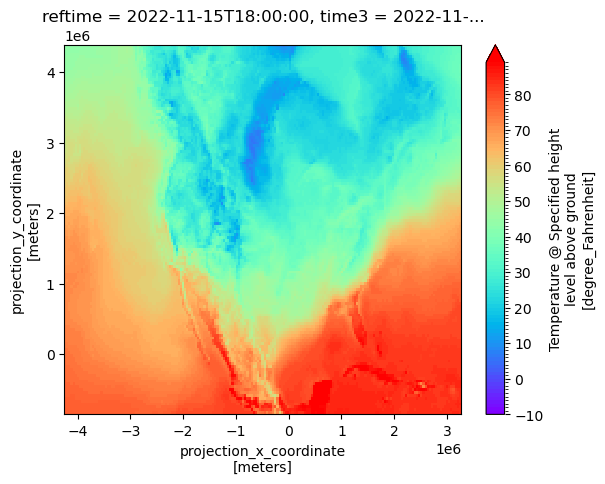

In [29]:
###################################################
#
# Quick Plot
#

# pre-set your own plotting levels

t2m_degF_levels = np.arange(-10,90,1)

display(t2m_degF)

# make a simple plot of the array using imshow's raster plot option.

contourplot = t2m_degF[0,:,:].plot.imshow(cmap   = plt.cm.rainbow,
                                   levels = t2m_degF_levels)

plt.show()

#
###################################################

Here is where those projections come to play!  The center point (where both the eastings and northings are zero) are 0 in this dataset are at the declared center of the projection.

Let's take a peak again at that "crs" field.  This time using metpy resources (that, in turn, source resources in cartopy)

In [30]:
###################################################
#
# let's peek at the crs through metpy's cartopy's interface 
#

data_crs = ds.metpy_crs.metpy.cartopy_crs


display("data_crs.proj4_init",data_crs.proj4_init)
display("data_crs.proj4_params",data_crs.proj4_params)

display(data_crs)

#
###################################################

'data_crs.proj4_init'

'+ellps=sphere +a=6371229.0 +b=6371229.0 +proj=lcc +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +no_defs'

'data_crs.proj4_params'

{'ellps': 'sphere',
 'a': 6371229.0,
 'b': 6371229.0,
 'proj': 'lcc',
 'lon_0': 265.0,
 'lat_0': 25.0,
 'x_0': 0.0,
 'y_0': 0.0,
 'lat_1': 25.0}

<Derived Projected CRS: +proj=lcc +ellps=sphere +a=6371229.0 +b=6371229.0  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (1SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

The projection information doesn't have the bounds we need -- but that's what the northings and eastings are for.

### Integrating the Cartopy Projection with MetPy's Eastings and Northings

MathplotLib can access [geographic projection information](https://matplotlib.org/3.2.1/api/projections_api.html).  We only need to merge projection with the eastings and northings.  We can do this with the cartopy_crs data. 

Doing this on your own, just do one line at a time to see how this comes together.

Basically each step builds on the other until you drop the image with plot.show()



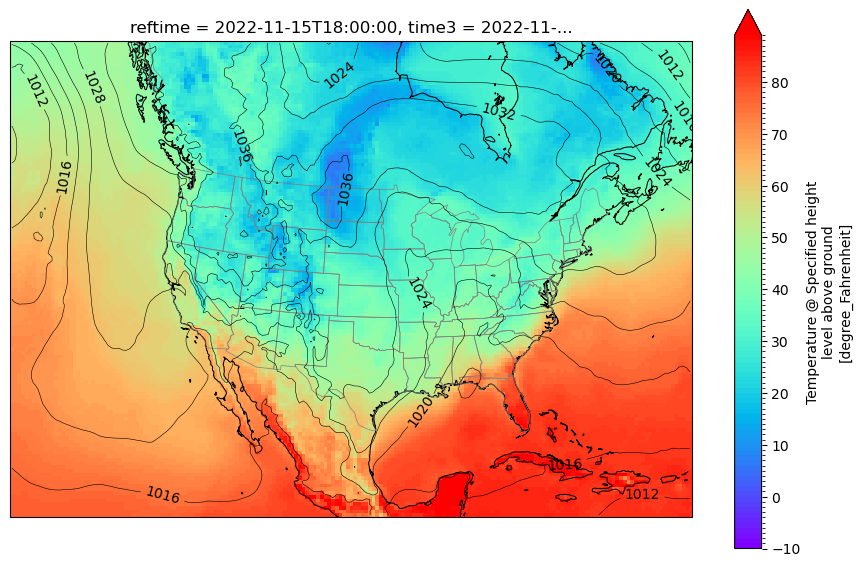

In [31]:
###################################################
#
# Integrating a projection data to our image data.
#

# make a figure space 

fig = plt.figure(figsize=(11, 7))

# add a plot element just one field

                   # nrows, ncols, index [which oddly starts with one (go fig)],
ax = fig.add_subplot(    1,     1,     1, 
                     projection = data_crs)

# of you use the coastlines and add_feature you can see it does 
#   the full cone and our place on it


ax.coastlines(resolution = 'auto',linewidths =  0.75)


ax.add_feature(cfeature.STATES.with_scale('110m'), 
                   linewidths = 0.5,
                   facecolor  = 'none', 
                   edgecolor  = 'tab:gray')

#ax.gridlines(draw_labels=True)

# here is our plot from above.

t2m_degF_levels = np.arange(-10,90,1)

contourplot = t2m_degF[0,:,:].plot.imshow(cmap   = plt.cm.rainbow,
                                   levels = t2m_degF_levels)

# and pow this will give us our mapping.

# Let's overlay our pressure contours.

mslp_contour_levels = np.arange(800,1040, 4)

contourfplot = mslp_hPa.plot.contour(colors     = "black",
                                     linewidths = 0.4,
                                     levels     = mslp_contour_levels)

plt.clabel(contourfplot, 
           contourfplot.levels, 
           fmt='%d')


plt.show()

#
###################################################

# Version Information
Install the Version_Information tool from GitHub

There was once a very handy tool that would print version information of the Python version, operating system, and the versions of the Python packages you are running.

The developer has moved on to other things but it still has a narrow but ~militant~ ernest fan base (myself included). The original isn't doesn't work with versions of Python above 3.7. So a couple of us wrote some patches to fix it. You can access my version below following these instructions.

1.  If you don't have GIT on your rig yet, you can fetch it from git

```
!conda install -y -v git
```

2.  You can pip it in using the following command.  

```
!pip install git+https://github.com/wjcapehart/version_information 
```

In [32]:
################################################################
#
# Loading Version Information
#
# You need git for this.

#

%load_ext version_information
%version_information version_information, numpy, metpy, matplotlib, cartopy

#
################################################################

Software versions
Python 3.9.13 64bit [Clang 13.0.1 ]
IPython 8.6.0
OS macOS 13.0.1 x86_64 i386 64bit
version_information 1.0.3
numpy 1.23.4
metpy 1.3.1
matplotlib 3.6.2
cartopy 0.21.0
Thu Nov 17 12:04:10 2022 MST

In [33]:
sat_file = "https://thredds.ucar.edu/thredds/dodsC/satellite/goes/east/products/CloudAndMoistureImagery/CONUS/Channel03/20221115/OR_ABI-L2-CMIPC-M6C03_G16_s20223191756170_e20223191756170_c20223191756170.nc"

dsat = xr.open_dataset(sat_file)

dsat = dsat.metpy.parse_cf()

display(dsat)

<xarray.Dataset>
Dimensions:               (y: 3000, x: 5000)
Coordinates:
    time                  datetime64[ns] 2022-11-15T17:56:17
  * y                     (y) float64 4.589e+06 4.588e+06 ... 1.584e+06
  * x                     (x) float64 -3.627e+06 -3.626e+06 ... 1.382e+06
    metpy_crs             object Projection: geostationary
Data variables:
    fixedgrid_projection  int32 ...
    Sectorized_CMI        (y, x) float32 ...
Attributes: (12/31)
    _NCProperties:               version=1|netcdflibversion=4.6.1|hdf5libvers...
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  3
    central_wavelength:          0.865
    ...                          ...
    pixel_y_size:                1.0
    satellite_latitude:          0.0
    satellite_longitude:         -75.0
    satellite_altitude:          35786023.0
    created_by:                  ldm-alchemy
    product_tiles_received:      15

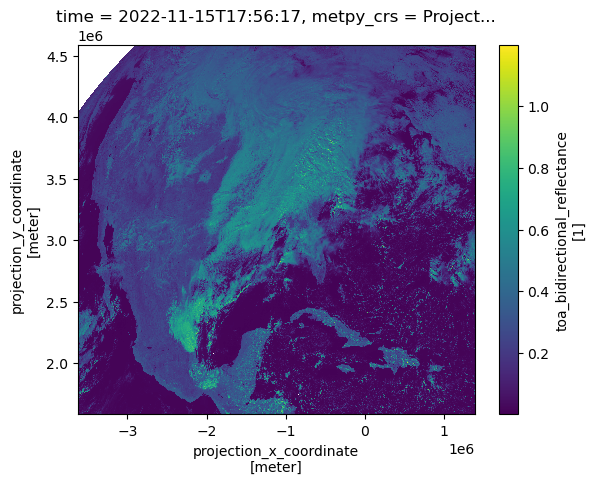

In [35]:

img = dsat["Sectorized_CMI"].plot()

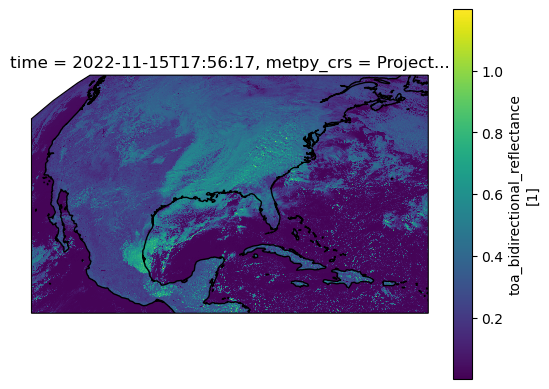

In [40]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1, projection = dsat["metpy_crs"].metpy.cartopy_crs)
img = dsat["Sectorized_CMI"].plot(ax = ax)

ax.add_feature(feature = cfeature.COASTLINE())